##problema:
Nosso cliente é uma empresa de cartão de crédito. Eles nos trouxeram um dataset que inclui dados demográficos e dados financeiros recentes (últimos seis meses) de uma amostra de 30.000 titulares de contas. Esses dados estão no nível de conta de crédito; em outras palavras, há uma linha para cada conta (você deve sempre esclarecer qual é a definição de linha, em um dataset). As linhas são rotuladas de acordo com se no mês seguinte ao período de dados histórico de seis meses um proprietário de conta ficou inadimplente, ou seja, não fez o pagamento mínimo.

##Objetivo:
# Seu objetivo é desenvolver um modelo que preveja se uma conta ficará inadimplente no próximo mês, de acordo com dados demográficos e históricos. Posteriormente no livro, discutiremos a aplicação prática do modelo.


Os dados já estão preparados e um dicionário de dados está disponível. O dataset fornecido com o livro, default_of_credit_card_clients__courseware_version_1_21_19.xls, é uma versão modificada do dataset do UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients. Examine essa página web, que inclui o dicionário de dados.



*Nota: O dataset original foi obtido no UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: Universidade da Califórnia, School of Information and Computer Science. Neste livro, modificamos o dataset para que atenda a nossos objetivos. O dataset modificado pode ser encontrado aqui: http://bit.ly/2HIk5t3.*

In [ ]:
!pip install ucimlrepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
default_of_credit_card_clients = fetch_ucirepo(id=350)

# data (as pandas dataframes)
x = default_of_credit_card_clients.data.features
y = default_of_credit_card_clients.data.targets #mes de pagamento padrão


# metadata
#print(default_of_credit_card_clients.metadata)

# variable information
#print(default_of_credit_card_clients.variables)


In [ ]:
x.shape, y.shape

((30000, 23), (30000, 1))

In [ ]:
x.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [ ]:
default_of_credit_card_clients.metadata['additional_info']

{'summary': "This research aimed at the case of customers' default payments in Taiwan and compares the predictive accuracy of probability of default among six data mining methods. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. Because the real probability of default is unknown, this study presented the novel Sorting Smoothing Method to estimate the real probability of default. With the real probability of default as the response variable (Y), and the predictive probability of default as the independent variable (X), the simple linear regression result (Y = A + BX) shows that the forecasting model produced by artificial neural network has the highest coefficient of determination; its regression intercept (A) is close to zero, and regression coefficient (B) to one. Therefore, among the six data mining techniques, artificial

In [ ]:
default_of_credit_card_clients.variables

,name,role,type,demographic,description,units,missing_values
0,ID,ID,Integer,None,None,None,no
1,X1,Feature,Integer,None,LIMIT_BAL,None,no
2,X2,Feature,Integer,Sex,SEX,None,no
3,X3,Feature,Integer,Education Level,EDUCATION,None,no
4,X4,Feature,Integer,Marital Status,MARRIAGE,None,no
5,X5,Feature,Integer,Age,AGE,None,no
6,X6,Feature,Integer,None,PAY_0,None,no
7,X7,Feature,Integer,None,PAY_2,None,no
8,X8,Feature,Integer,None,PAY_3,None,no
9,X9,Feature,Integer,None,PAY_4,None,no


In [ ]:
dados = x.drop_duplicates()

# Removing duplicates from account_details
#account_details_unique = account_details.drop_duplicates(subset='account_id')

# Performing a one-to-one merge again
#merged_accounts = accounts.merge(account_details_unique, on='account_id', how='inner', validate='one_to_one')
#print(merged_accounts)


<Axes: >

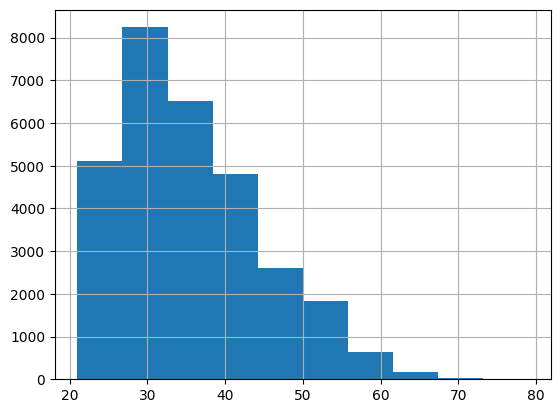

In [ ]:
dados['X5'].hist(bins=10)

In [ ]:
dados['X5'].describe()

,X5
count,29944.000000
mean,35.488412
std,9.220169
min,21.000000
25%,28.000000
50%,34.000000
75%,41.000000
max,79.000000


<Axes: title={'center': 'Idade'}>

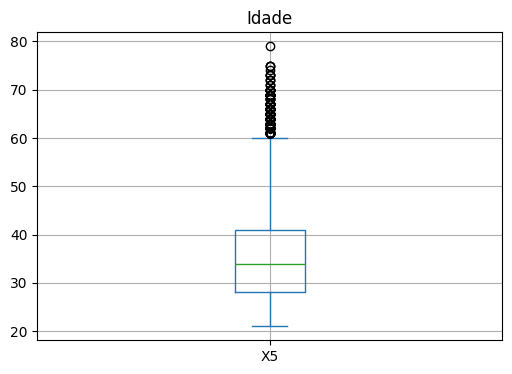

In [ ]:
dados['X5'].plot.box(grid=True, title='Idade',figsize=(6,4))

In [ ]:
#conta inadimiplente, não pagou toda a fatura, ou seja, ficou para o proximo mês
#-1 ->pagou devidamente
#0 ->significa que o pagamento mínimo foi feito, mas o saldo total devedor
#não foi pago (isto é, uma parcela do saldo devedor foi transportada para o próximo mês)

#1 -> pagou 1 mês atrasado
#2 -> pagou 2 meses atrasado
#e assim por diante

pay = ['X6','X7','X8','X9','X10','X11']
bill_amout = ['X12','X13','X14','X15','X16','X17'] #X12-X17: X12 = valor do extrato da conta em setembro de 2005
pay_amount = ['X18','X19','X20','X21','X22','X23'] #X18-X23: Valor do pagamento anterior (dólar NT). X18 = valor pago em setembro de 2005

dados[pay]

,X6,X7,X8,X9,X10,X11
0,2,2,-1,-1,-2,-2
1,-1,2,0,0,0,2
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,-1,0,-1,0,0,0
...,...,...,...,...,...,...
29995,0,0,0,0,0,0
29996,-1,-1,-1,-1,0,0
29997,4,3,2,-1,0,0
29998,1,-1,0,0,0,-1


In [ ]:
dados[bill_amout]

,X12,X13,X14,X15,X16,X17
0,3913,3102,689,0,0,0
1,2682,1725,2682,3272,3455,3261
2,29239,14027,13559,14331,14948,15549
3,46990,48233,49291,28314,28959,29547
4,8617,5670,35835,20940,19146,19131
...,...,...,...,...,...,...
29995,188948,192815,208365,88004,31237,15980
29996,1683,1828,3502,8979,5190,0
29997,3565,3356,2758,20878,20582,19357
29998,-1645,78379,76304,52774,11855,48944


In [ ]:
dados[pay_amount]

,X18,X19,X20,X21,X22,X23
0,0,689,0,0,0,0
1,0,1000,1000,1000,0,2000
2,1518,1500,1000,1000,1000,5000
3,2000,2019,1200,1100,1069,1000
4,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...
29995,8500,20000,5003,3047,5000,1000
29996,1837,3526,8998,129,0,0
29997,0,0,22000,4200,2000,3100
29998,85900,3409,1178,1926,52964,1804


In [ ]:
dados[pay].describe()

,X6,X7,X8,X9,X10,X11
count,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000
mean,-0.017199,-0.130677,-0.163305,-0.217873,-0.263492,-0.288438
std,1.123389,1.195703,1.195113,1.167423,1.131460,1.148375
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [ ]:
#(1 = married; 2 = single; 3 = others)

pagamento_casados = dados.query('X4 ==1')[pay]
pagamento_solteiro = dados.query('X4 == 2')[pay]

array([[<Axes: title={'center': 'X6'}>, <Axes: title={'center': 'X7'}>],
       [<Axes: title={'center': 'X8'}>, <Axes: title={'center': 'X9'}>],
       [<Axes: title={'center': 'X10'}>, <Axes: title={'center': 'X11'}>]],
      dtype=object)

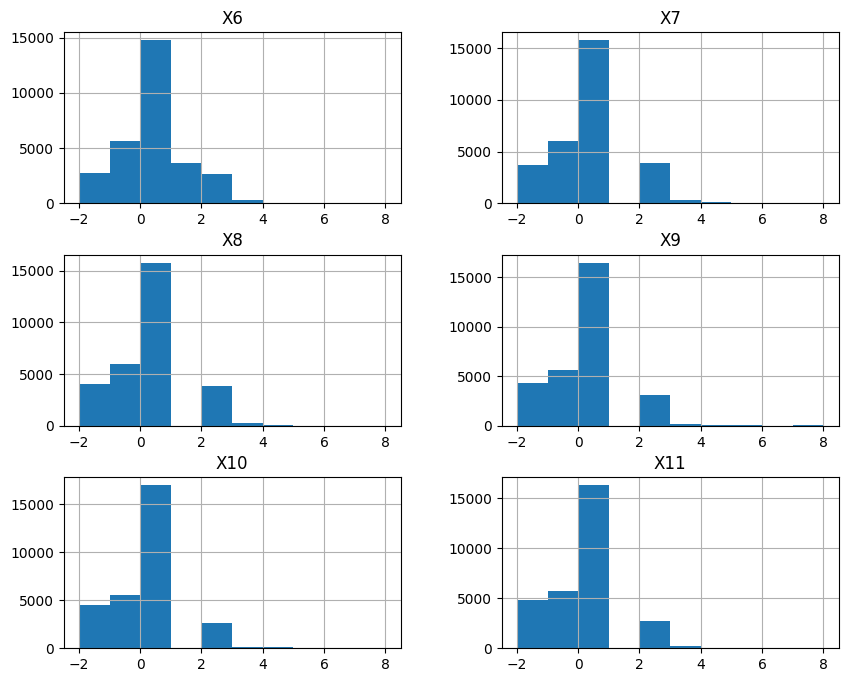

In [ ]:
dados[pay].hist(figsize=(10,8))

array([[<Axes: title={'center': 'X6'}>, <Axes: title={'center': 'X7'}>],
       [<Axes: title={'center': 'X8'}>, <Axes: title={'center': 'X9'}>],
       [<Axes: title={'center': 'X10'}>, <Axes: title={'center': 'X11'}>]],
      dtype=object)

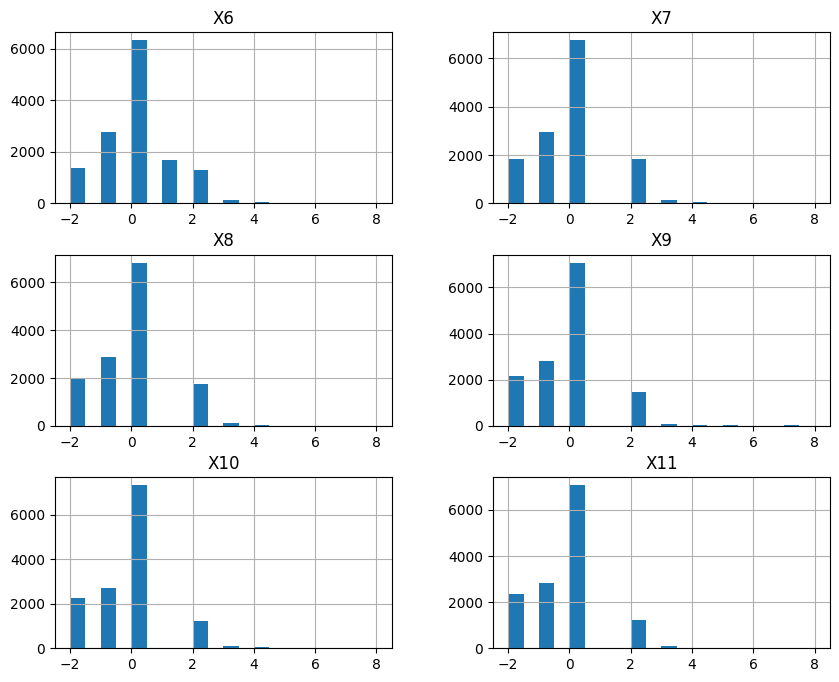

In [ ]:
pagamento_casados.hist(bins=20, figsize=(10,8))

array([[<Axes: title={'center': 'X6'}>, <Axes: title={'center': 'X7'}>],
       [<Axes: title={'center': 'X8'}>, <Axes: title={'center': 'X9'}>],
       [<Axes: title={'center': 'X10'}>, <Axes: title={'center': 'X11'}>]],
      dtype=object)

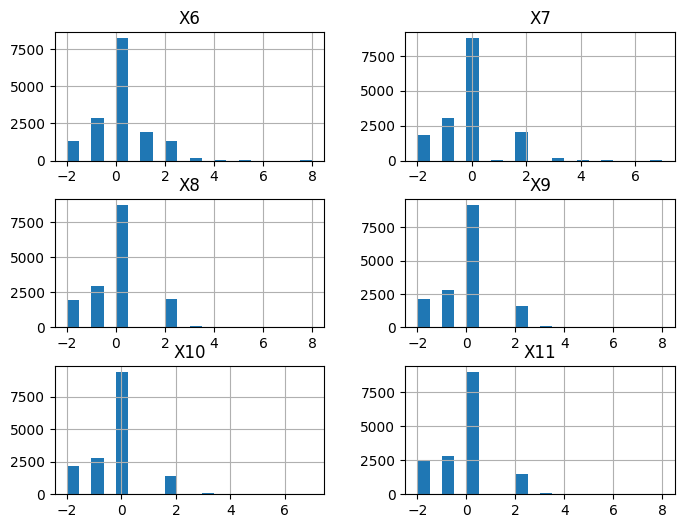

In [ ]:
pagamento_solteiro.hist(bins=20,figsize=(8,6))

In [ ]:
dados.query('X3 == 1')[bill_amout]

,X12,X13,X14,X15,X16,X17
5,64400,57069,57608,19394,19619,20024
6,367965,412023,445007,542653,483003,473944
11,12261,21670,9966,8517,22287,13668
14,70887,67060,63561,59696,56875,55512
16,15376,18010,17428,18338,17905,19104
...,...,...,...,...,...,...
29986,2220,0,0,0,0,0
29987,23292,14077,15546,108047,93708,97353
29988,279640,252913,243075,245750,175005,179687
29989,3425,9009,-3,780,0,0


In [ ]:
pessoa_inadimiplente = dados.query('X6==0')

array([[<Axes: title={'center': 'X4'}>, <Axes: title={'center': 'X3'}>],
       [<Axes: title={'center': 'X2'}>, <Axes: >]], dtype=object)

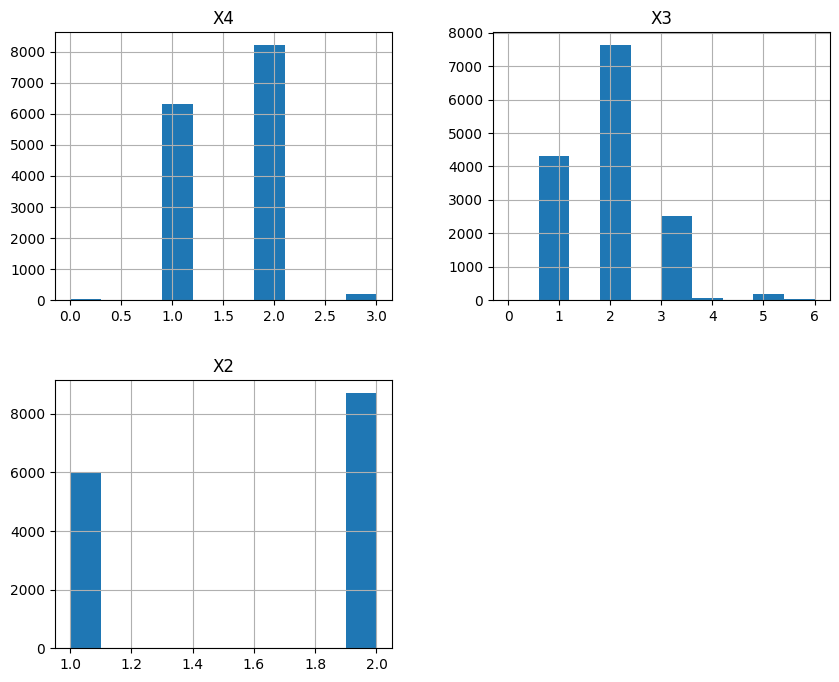

In [ ]:
pessoa_inadimiplente[['X4', 'X3', 'X2']].hist(figsize=(10,8))

<Axes: >

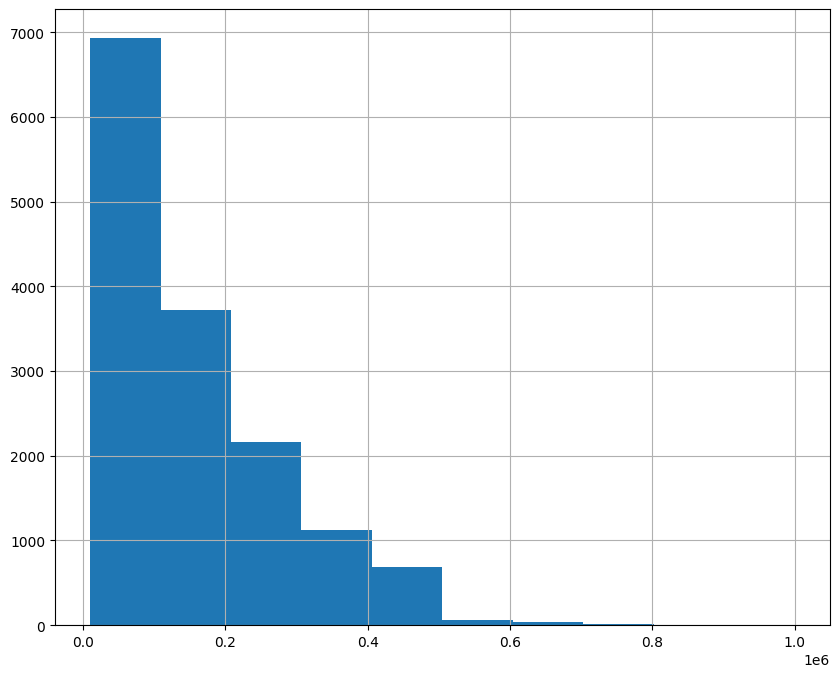

In [ ]:
pessoa_inadimiplente['X1'].hist(figsize=(10,8))

In [ ]:
pessoa_inadimiplente[bill_amout]

,X12,X13,X14,X15,X16,X17
2,29239,14027,13559,14331,14948,15549
3,46990,48233,49291,28314,28959,29547
5,64400,57069,57608,19394,19619,20024
6,367965,412023,445007,542653,483003,473944
7,11876,380,601,221,-159,567
...,...,...,...,...,...,...
29990,138325,137142,139110,138262,49675,46121
29992,8802,10400,0,0,0,0
29993,3042,1427,102996,70626,69473,55004
29995,188948,192815,208365,88004,31237,15980


In [ ]:
pessoa_inadimiplente[pay_amount]

,X18,X19,X20,X21,X22,X23
2,1518,1500,1000,1000,1000,5000
3,2000,2019,1200,1100,1069,1000
5,2500,1815,657,1000,1000,800
6,55000,40000,38000,20239,13750,13770
7,380,601,0,581,1687,1542
...,...,...,...,...,...,...
29990,6000,7000,4228,1505,2000,2000
29992,2000,0,0,0,0,0
29993,2000,111784,4000,3000,2000,2000
29995,8500,20000,5003,3047,5000,1000


In [ ]:
pessoa_inadimiplente['X1']

,X1
2,90000
3,50000
5,50000
6,500000
7,100000
...,...
29990,140000
29992,10000
29993,100000
29995,220000


In [ ]:
 pessoa_inadimiplente[bill_amout]

,X12,X13,X14,X15,X16,X17
2,29239,14027,13559,14331,14948,15549
3,46990,48233,49291,28314,28959,29547
5,64400,57069,57608,19394,19619,20024
6,367965,412023,445007,542653,483003,473944
7,11876,380,601,221,-159,567
...,...,...,...,...,...,...
29990,138325,137142,139110,138262,49675,46121
29992,8802,10400,0,0,0,0
29993,3042,1427,102996,70626,69473,55004
29995,188948,192815,208365,88004,31237,15980


In [ ]:
pessoa_inadimiplente.query('X18 ==0')[pay_amount]

,X18,X19,X20,X21,X22,X23
232,0,0,2624,45567,1747,2000
258,0,0,0,0,0,0
611,0,0,0,0,2650,0
622,0,0,0,0,0,0
867,0,0,0,0,0,47970
...,...,...,...,...,...,...
29536,0,0,0,0,0,0
29677,0,0,0,310,9500,800
29743,0,4166,0,0,0,0
29780,0,4000,1044,0,2000,2000
